# Natural Language Processing

## Overview of Natural Language Processing of Tweets

##### Sentiment Analysis ​is a branch of Natural Language Processing (NLP) that allows us to determine algorithmically whether a statement or document is “positive” or “negative”.

##### Sentiment analysis is a technology of increasing importance in the modern society as it allows individuals and organizations to detect trends in public opinion by analyzing social media content. 

##### Keeping abreast of socio-political developments is especially important during periods of policy shifts such as election years, when both electoral candidates and companies can benefit from sentiment analysis by making appropriate changes to their campaigning and business strategies respectively.

##### The purpose of this assignment is to compute the sentiment of text information - in our case, tweets posted in 2019 Canadian elections - and answer the research question: ​“What can public opinion on Twitter tell us about the Canadian political landscape in 2019?” T​ he goal is to essentially use sentiment analysis on Twitter data to get insight into the 2019 Canadian elections.

#### Objectives:

##### 1. Implement functionality to parse and clean data according to given requirements. 

##### 2. Understand how exploring the data by creating visualizations leads to a deeper understanding of the data.

##### 3. Learn about training and testing machine learning algorithms (logistic regression, k-NN, decision trees, random forest, XGBoost).

##### 4. Understand how to apply machine learning algorithms to the task of text classification.

##### 5. Improve on skills and competencies required to collate and present domain specific, evidence-based insights.

In [576]:
#Installing and importing necessary package and libraries
!pip install nltk
!pip install unidecode
!pip install textblob
!pip install wordcloud
!pip install xgboost
!pip install lxml
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from unidecode import unidecode
from textblob import Word
nltk.download("stopwords")
from nltk.corpus import stopwords
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.metrics import classification_report
stop_words = pd.read_csv('stop_words.txt') #To import stop words txt file

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ayomideonaduja/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Importing the generic_tweet TXT file into Pandas data frame
generic_tweets = pd.read_csv("generic_tweets.txt")

In [3]:
generic_tweets.columns = ['class','id','date','query','user','text']

In [4]:
generic_tweets.head(8)

class          id                          date     query             user  \
0      0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1      0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2      0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3      0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4      0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   
5      0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY         joy_wolf   
6      0  1467811592  Mon Apr 06 22:20:03 PDT 2009  NO_QUERY          mybirch   
7      0  1467811594  Mon Apr 06 22:20:03 PDT 2009  NO_QUERY             coZZ   

                                                text  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....  
5                      @Kwesidei not the whole crew   
6                                        Need a hug   
7  @LOLTrish hey  long time no see! Yes.. Rains a...

In [5]:
generic_tweets.tail(8)

class          id                          date     query  \
199992      4  1693955837  Mon May 04 00:27:10 PDT 2009  NO_QUERY   
199993      4  1693956028  Mon May 04 00:27:13 PDT 2009  NO_QUERY   
199994      4  1693956082  Mon May 04 00:27:13 PDT 2009  NO_QUERY   
199995      4  1693956088  Mon May 04 00:27:13 PDT 2009  NO_QUERY   
199996      4  1693956096  Mon May 04 00:27:14 PDT 2009  NO_QUERY   
199997      4  1693956099  Mon May 04 00:27:14 PDT 2009  NO_QUERY   
199998      4  1693956134  Mon May 04 00:27:14 PDT 2009  NO_QUERY   
199999      4  1693956160  Mon May 04 00:27:14 PDT 2009  NO_QUERY   

                user                                               text  
199992      ssoun126  @yoomyee haha sorry about that LOL. Btw nice t...  
199993    jchavarria                             Ok. On my way to work   
199994  sheryonstone  you have got to be kidding me @ladypn Are you ...  
199995    FelineBred  @jvdouglas  haha, no, the remark on maternity ...  
199996   softthistle                              @altitis and to you!   
199997     elysion32  Okie doke!! Time for me to escape for the Nort...  
199998    fancyjessy                     finished the lessons, hooray!   
199999      noraezan  Some ppl are just fucking KP0. Cb ! Stop askin...

In [6]:
generic_tweets.nunique()[0]

2

In [7]:
#Assigning Postive sentiments as 1 (Negative senitments are already mapped as 0)
generic_tweets['class'] = generic_tweets['class'].map({4: 1, 0: 0})

##### Checking if positive statements are assigned as 1 

In [8]:
generic_tweets.tail(4)

class          id                          date     query  \
199996      1  1693956096  Mon May 04 00:27:14 PDT 2009  NO_QUERY   
199997      1  1693956099  Mon May 04 00:27:14 PDT 2009  NO_QUERY   
199998      1  1693956134  Mon May 04 00:27:14 PDT 2009  NO_QUERY   
199999      1  1693956160  Mon May 04 00:27:14 PDT 2009  NO_QUERY   

               user                                               text  
199996  softthistle                              @altitis and to you!   
199997    elysion32  Okie doke!! Time for me to escape for the Nort...  
199998   fancyjessy                     finished the lessons, hooray!   
199999     noraezan  Some ppl are just fucking KP0. Cb ! Stop askin...

##### Checking if negative statements are assigned as 0 

In [9]:
generic_tweets.head(4)

class          id                          date     query             user  \
0      0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1      0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2      0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3      0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   

                                                text  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire

In [10]:
generic_tweets['length'] = generic_tweets['text'].apply(len)

### The tweets given, are not in a form ready for analysis. Therefore, the first step is to “clean” the data. By designing a procedure that prepares the data for analysis by fulfilling the following.
####  (1). Html character codes (i.e., &...;) are replaced with an ASCII equivalent.
####  (2). All html tags and attributes (i.e., /<[^>]+>/) are removed.
####  (3). All URLs are removed.
####  (4). All characters in the text are in lowercase.
####  (5). All stop words are removed. 

### Dropping unnecessary columns

In [11]:
#Removing unnecessary columns
generic_tweets.drop(['id','date','query','user'],axis=1,inplace=True)

#### Converting to ASCII

In [12]:
generic_tweets['text'] = generic_tweets['text'].apply(lambda x: " ".join(unidecode(x) for x in x.split()))

#### Removing html & url 

In [13]:
generic_tweets['text'] = generic_tweets['text'].apply(lambda x: re.sub('https?://[A-Za-z0-9./]+','',x))

In [14]:
pd.options.display.max_colwidth = 150 # To see untruncated form of each column
generic_tweets.head(8)

class  \
0      0   
1      0   
2      0   
3      0   
4      0   
5      0   
6      0   
7      0   

                                                                                                             text  \
0                      @switchfoot  - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D   
1  is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!   
2                        @Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds   
3                                                                  my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.   
5                                                                                    @Kwesidei not the whole crew   
6                                                                                                      Need a hug   
7               @LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?   

   length  
0     115  
1     111  
2      89  
3      47  
4     111  
5      29  
6      11  
7      99

#### Removing Mentions

In [15]:
#removing @mentions rather than just @ symbol
generic_tweets['text'] = generic_tweets['text'].str.replace('(?:@[\w_]+)','')

#### Removing hashtags

In [16]:
generic_tweets['text'] = generic_tweets['text'].str.replace('#[A-Za-z0-9_]+','')

#### Removing other symbols

In [18]:
generic_tweets['text'] = generic_tweets['text'].str.replace("-",'')

generic_tweets['text'] = generic_tweets['text'].str.replace("(",'')

generic_tweets['text'] = generic_tweets['text'].str.replace("!",'')

generic_tweets['text'] = generic_tweets['text'].str.replace(")",'')

generic_tweets['text'] = generic_tweets['text'].str.replace(":",'')

generic_tweets['text'] = generic_tweets['text'].str.replace(";",'')

generic_tweets['text'] = generic_tweets['text'].str.replace("'",'')

#### Removing numbers

In [19]:

generic_tweets['text'] = generic_tweets['text'].str.replace("[0-9]+","", case = False)

#### Converting to lower case

In [20]:

generic_tweets['text'] = generic_tweets['text'].apply(lambda x: " ".join(x.lower() for x in x.split())) 

#### Removing punctuation

In [21]:
generic_tweets['text'] = generic_tweets['text'].str.replace('[^\w\s]','')


### Removing stop words

In [39]:
generic_tweets['text'] = generic_tweets['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


### Removing common words

In [29]:
#removal of common words
freq = pd.Series(' '.join(generic_tweets['text']).split()).value_counts()[:10]
freq = list(freq.index)
generic_tweets['text'] = generic_tweets['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))


### Removing rare words

#### The next procedure is to remove rare words, because they are rare, the association between them and other words is dominated by noise
##### Source: https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/

In [24]:
#removal of rarewords
freq = pd.Series(' '.join(generic_tweets['text']).split()).value_counts()[-10:]
freq = list(freq.index)
generic_tweets['text'] = generic_tweets['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))


### Lemmetazie

#### Lemmentiziation, here, we're converting the word to its root word e.g electing,election would become elect. This is more effective compared to stemming because stemming just get rid of the suffices

In [25]:
nltk.download('wordnet')
generic_tweets['text'] = generic_tweets['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ayomideonaduja/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### The next step in the cleaning phase is to tokenize, removing stop words etc.
##### Source: Tutorial(Natural Language Processing)

In [27]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer

try:
    from gensim.models import word2vec
except:
    !pip install gensim
    from gensim.models import word2vec

In [28]:
list_lc = []
s1 = ' '
corpus_clean = []
for line in generic_tweets['text']:
    lower_case = line.lower() # lowercase 
    list_lc.append(lower_case)
    tokenizer = RegexpTokenizer(r'\w+')         
    b = tokenizer.tokenize(lower_case)
    words_rmStop = [word for word in b if word not in stopwords.words('english')] # remove stop words
    ps = PorterStemmer()
    words_stem = [ps.stem(word) for word in words_rmStop] # stem 
    corpus_clean.append(s1.join(words_stem))
#Source: NLP Example in tutorial

#### Now, it is time to create a new dataframe for cleaned generic tweets

In [34]:
GT = pd.DataFrame ({'text': corpus_clean,'sentiment_score':generic_tweets['class']})
GT['length'] = GT['text'].apply(len)
#Checking dataset
GT.head()

text  \
0                       awww that bummer shoulda got david carr third day   
1  upset cant updat facebook text might cri result school today also blah   
2                            dive mani time ball manag save rest go bound   
3                                         whole bodi feel itchi like fire   
4                                                   behav im mad cant see   

   sentiment_score  length  
0                0      49  
1                0      70  
2                0      44  
3                0      31  
4                0      21

#### Now, we're done with the cleaning for generic tweets. The next file to clean is the Canadian Elections 2019 datset.

## Canadian Elections 2019

In [41]:
#Importing the canadian_election CSV file into Pandas data frame
election_text = pd.read_csv("Canadian_elections_2019.csv") 

#### Assigning Postive sentiments as 1 (Negative senitments are already mapped as 0)

In [43]:
#Assigning Postive sentiments as 1 (Negative senitments are already mapped as 0)

election_text['sentiment_score'] = election_text['sentiment'].apply(lambda x:1 if x=='positive' else 0)


#### Creating a new column to indicate political party

In [ ]:
#Creating a new column to indicate political party
election_text['political_party'] = ''

In [44]:
election_text

sentiment                      negative_reason  \
0     negative  Women Reproductive right and Racism   
1     positive                                  NaN   
2     negative                              Economy   
3     positive                                  NaN   
4     negative                              Economy   
...        ...                                  ...   
2128  negative                              Scandal   
2129  negative                              Scandal   
2130  positive                                  NaN   
2131  negative  Women Reproductive right and Racism   
2132  positive                                  NaN   

                                                                                                                                                       text  \
0     b"@RosieBarton So instead of your suggestion, how about we agree that #Canadian #women can not and should not trust that #AndrewScheer and a #Cons...   
1                             b"#AllWomanSpacewalk it's real!\n@Space_Station \n#EtobicokeNorth #CityofTO #ONPoli #cdnpoli #elxn43 https://t.co/wgdXLksTbQ"   
2                       b"#Brantford It's going to cost YOU $94 BILLION FOR THE NEXT 4 YEARS! ASK JUSTIN! #elxn43 #cdnpoli #Canada https://t.co/9DTLLd9972"   
3                                      b"#Canada #CanadaElection2019 #CanadaVotes \n#elxn43 \n\nCan't decide? This should help!\n\nhttps://t.co/UNe5J1tDJ6"   
4     b"#Canada #taxpayers are sick &amp; tired of having their hard earned $ donated to corporate welfare bums that don't need it! This is only one of ...   
...                                                                                                                                                     ...   
2128  b'You know he was doing a good enough job smearing his own campaign, right @AndrewScheer? #cdnpoli #elxn43 "Bernier files complaint to elections w...   
2129  b'You missed the comment. Deflecting the issue does not answer. Best response is like your agent gave when asked if @kinsellawarren was hired by @...   
2130                 b'Your daily reminder:\n@theJagmeetSingh endorses strategic voting\n#elxn43 #elxn2019 #CDNpoli #LPC #NDP #GPC https://t.co/DcnC7PWM6g'   
2131                      b'Yup...not going to reopen the abortion debate...\xf0\x9f\x98\x8f\n#elxn43 #ScheerLies #ScheerHypocrisy https://t.co/88hl2SmgcT'   
2132                                                                                                         b'Zing.\n#NDP #elxn43 https://t.co/xo6Qe4jV3p'   

      sentiment_score political_party  
0                   0                  
1                   1                  
2                   0                  
3                   1                  
4                   0                  
...               ...             ...  
2128                0                  
2129                0                  
2130                1                  
2131                0                  
2132                1                  

[2133 rows x 5 columns]

### The tweets given, are not in a form ready for analysis. Therefore, the first step is to “clean” the data. By designing a procedure that prepares the data for analysis by fulfilling the following.
####  (1). Html character codes (i.e., &...;) are replaced with an ASCII equivalent.
####  (2). All html tags and attributes (i.e., /<[^>]+>/) are removed.
####  (3). All URLs are removed.
####  (4). All characters in the text are in lowercase.
####  (5). All stop words are removed. 

### Converting to ASCII

In [45]:
election_text['text'] = election_text['text'].apply(lambda x: " ".join(unidecode(x) for x in x.split()))

### Removing html & url 

In [46]:
election_text['text'] = election_text['text'].apply(lambda x: re.sub('https?://[A-Za-z0-9./]+','',x))

### Converting to lower case

In [47]:
election_text['text'] = election_text['text'].apply(lambda x: " ".join(x.lower() for x in x.split())) 

## Political party identification by tweets

##### Since they are all converted to lower case, the following for loop code are used to determing the political party (Conservative, Liberal, New_Democratic_Party and None) of the corresponding tweets by looking at the relevant words partaining to the ploitical party and hashtags. 
##### The sequence at which the classification is done for political party is crucial because there might be cases wherby more than one party would be mentioned in a tweet, therefore the order of the code for the loop to identify political party would be Conservative, Liberal, New Democratic Party.

### Conservative Political Party

In [48]:
for i in range(len(election_text['text'])):
  tweet = election_text['text'][i]
  political_party =['andrewscheer','andrew','scheer','cpc','cpc_hq','conservative','kinsellagate']
  for j in political_party:
    result = tweet.find(j)
    if result !=-1:
      election_text['political_party'][i] = 'Conservative'

### Liberal Party of Canada

In [49]:
for i in range(len(election_text['text'])):
  tweet = election_text['text'][i]
  political_party =['justin','trudeau','justintrudea','lpc','chooseforward','liberal','liberal_party']
  for j in political_party:
    result = tweet.find(j)
    if result !=-1:
      election_text['political_party'][i] = 'Liberal'

### New Democratic Party

In [50]:
for i in range(len(election_text['text'])):
  tweet = election_text['text'][i]
  political_party =['jagmeetsingh','jagmeet','singh','@ndp','#ndp','ndp','uprisingh']
  for j in political_party:
    result = tweet.find(j)
    if result !=-1:
      election_text['political_party'][i] = 'New_Democratic_Party'

### Assigning the tweets not associated to political party as none

In [51]:

election_text['political_party']=election_text['political_party'].replace(to_replace ='', value ="None") 

#### Creating a length column and showing the length of the 'text' column

In [52]:
election_text['length'] = election_text['text'].apply(len)

#### Checking dataset

In [53]:
election_text

sentiment                      negative_reason  \
0     negative  Women Reproductive right and Racism   
1     positive                                  NaN   
2     negative                              Economy   
3     positive                                  NaN   
4     negative                              Economy   
...        ...                                  ...   
2128  negative                              Scandal   
2129  negative                              Scandal   
2130  positive                                  NaN   
2131  negative  Women Reproductive right and Racism   
2132  positive                                  NaN   

                                                                                                                                                       text  \
0     b"@rosiebarton so instead of your suggestion, how about we agree that #canadian #women can not and should not trust that #andrewscheer and a #cons...   
1                                                    b"#allwomanspacewalk it's real!\n@space_station \n#etobicokenorth #cityofto #onpoli #cdnpoli #elxn43 "   
2                                              b"#brantford it's going to cost you $94 billion for the next 4 years! ask justin! #elxn43 #cdnpoli #canada "   
3                                                             b"#canada #canadaelection2019 #canadavotes \n#elxn43 \n\ncan't decide? this should help!\n\n"   
4     b"#canada #taxpayers are sick &amp; tired of having their hard earned $ donated to corporate welfare bums that don't need it! this is only one of ...   
...                                                                                                                                                     ...   
2128  b'you know he was doing a good enough job smearing his own campaign, right @andrewscheer? #cdnpoli #elxn43 "bernier files complaint to elections w...   
2129  b'you missed the comment. deflecting the issue does not answer. best response is like your agent gave when asked if @kinsellawarren was hired by @...   
2130                                        b'your daily reminder:\n@thejagmeetsingh endorses strategic voting\n#elxn43 #elxn2019 #cdnpoli #lpc #ndp #gpc '   
2131                                             b'yup...not going to reopen the abortion debate...\xf0\x9f\x98\x8f\n#elxn43 #scheerlies #scheerhypocrisy '   
2132                                                                                                                                b'zing.\n#ndp #elxn43 '   

      sentiment_score       political_party  length  
0                   0          Conservative     283  
1                   1                  None     102  
2                   0               Liberal     108  
3                   1                  None      93  
4                   0               Liberal     286  
...               ...                   ...     ...  
2128                0          Conservative     222  
2129                0          Conservative     261  
2130                1  New_Democratic_Party     111  
2131                0          Conservative     106  
2132                1  New_Democratic_Party      23  

[2133 rows x 6 columns]

#### Nice, all sorted and the lenght of the 'text' is applied. But, as seen from the output above, the text column contains tweets that really needs to be processed and cleaned before any action can be taken on the dataset. The same methodolgy used to clean the generic tweets would be applied here as well.

#### Removing new line showing in text file

In [54]:
election_text['text'] = election_text['text'].replace(r'\\n',' ', regex=True)


In [55]:
election_text['text'] = election_text['text'].str.replace(r'\\x[A-Za-z0-9_]+',' ', regex=True)

### Removing Numbers

In [56]:
election_text['text'] = election_text['text'].str.replace("[0-9]+","", case = False)

### Removing hashtags and other symbols that would affect the data

In [58]:
election_text['text'] = election_text['text'].str.replace('amp','')
election_text['text'] = election_text['text'].str.replace('(?:@[\w_]+)','')
election_text['text'] = election_text['text'].str.replace('#[A-Za-z0-9_]+','')
election_text['text'] = election_text['text'].str.replace('b"','') 
election_text['text'] = election_text['text'].str.replace("b'",'')
election_text['text'] = election_text['text'].str.replace('"','')
election_text['text'] = election_text['text'].str.replace("'",'')
election_text['text'] = election_text['text'].str.replace('[^\w\s]','')

election_text['text'] = election_text['text'].str.replace("http\S+","", case = False)

#### Checking cleaning progess so far

In [59]:
election_text.tail(15)

sentiment                      negative_reason  \
2113  positive                                  NaN   
2114  negative                               Others   
2115  negative                              Economy   
2116  positive                                  NaN   
2117  positive                                  NaN   
2118  negative  Women Reproductive right and Racism   
2119  negative  Women Reproductive right and Racism   
2120  positive                                  NaN   
2121  negative                               Others   
2122  negative                            Tell lies   
2123  positive                                  NaN   
2124  negative                            Tell lies   
2125  negative                               Others   
2126  negative                      Climate Problem   
2127  positive                                  NaN   
2128  negative                              Scandal   
2129  negative                              Scandal   
2130  positive                                  NaN   
2131  negative  Women Reproductive right and Racism   
2132  positive                                  NaN   

                                                                                                                                                       text  \
2113  yes free tuition is a key plank in their platform we cant keep straddling our young people with huge debt several progressive countries have free ...   
2114  yes i have no doubt you have a very busy schedule of last minute liberal trolling in order to try to secure a second term for  have you been promi...   
2115  yes if liberals don    get a majority ndp will ask for no pipeline st trudeau gets his excuse to cancel it  canada    economy is decimated it    t...   
2116  yes it    an endorsement  but the most important thing is to exercise your right to vote in a free and fair election and to participate in a democ...   
2117  yes we have encouraged one another to cast our ballots but when the polls close what then i hope everyone will have company on monday night in bar...   
2118  yet andrew scheer maintains and expects us to believe that the issue is closed antiabortion activists who are against the rights of women to make ...   
2119                                                    yet another exle of the constant danger the conservatives pose to the rights and freedom of women     
2120  you are absolutely correct priya the canadian media which is unfairly subsidized by taxpayers must look deeply at what they have produced and parr...   
2121                you are sort of betraying the memory of those who fought for freedom    the ability to vote is far better than the ability not to vote    
2122  you can always tell if a person is good at caigning if they own their own stupid statements   i thought it was overblown but in the end it was a d...   
2123                               you can do it  make the cancer is sexy lady  an embarrassing part of your past vote for a better future vote  vote         
2124      you can vote for the same dishonest and slandering politicians as always or choose to do politics differently on october st                         
2125                                                                         you can    be a supervillain of an election if you failed at all your jobs       
2126  you care about limiting  and are wondering which party to vote for in  climate scientist  delineates what the six main parties are proposing in te...   
2127                                you heard it here first head to to figure out who aligns best with your values how to vote and why your vote matters      
2128  you know he was doing a good enough job smearing his own caign right    bernier files complaint to elections watchdog over professional smear caig...   
2129  you missed the comment deflecting the issue does not answer best response is like your agent gave when asked if  was hired by   i guess matt

#### The next procedure is to remove rare words, because they are rare, the association between them and other words is dominated by noise
##### Source: https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/

In [60]:
#Removing  of rarewords
freq = pd.Series(' '.join(election_text['text']).split()).value_counts()[-10:]
freq = list(freq.index)
election_text['text'] = election_text['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))


#### Removing commonly occuring words

In [ ]:
#Removing common words in the text column
freq = pd.Series(' '.join(generic_tweets['text']).split()).value_counts()[:10]
freq = list(freq.index)
election_text['text'] = election_text['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))


#### Lemmentiziation, here, we're converting the word to its root word e.g electing,election would become elect. This is more effective compared to stemming because stemming just get rid of the suffices

In [62]:
nltk.download('wordnet')
election_text['text'] = election_text['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ayomideonaduja/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### The next step in the cleaning phase is to tokenize, removing stop words etc.
##### Source: Tutorial(Natural Language Processing)

In [64]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer

try:
    from gensim.models import word2vec
except:
    !pip install gensim
    from gensim.models import word2vec

In [65]:
list_lc = []
s1 = ' '
corpus_clean2 = []
for line in election_text['text']:
    lower_case = line.lower() # lowercase 
    list_lc.append(lower_case)
    tokenizer = RegexpTokenizer(r'\w+')         
    b = tokenizer.tokenize(lower_case)
    words_rmStop = [word for word in b if word not in stopwords.words('english')] # remove stop words
    ps = PorterStemmer()
    words_stem = [ps.stem(word) for word in words_rmStop] # stem 
    corpus_clean2.append(s1.join(words_stem))

#### Now, it is time to create a new dataframe for cleaned election tweets

In [68]:
ET = pd.DataFrame ({'sentiment':election_text['sentiment'],'negative_reason':election_text['negative_reason'],'text': corpus_clean2,'political_party':election_text['political_party'],'sentiment_score':election_text['sentiment_score']})
#Checking cleaned Canadian Election tweets
ET.head()

sentiment                      negative_reason  \
0  negative  Women Reproductive right and Racism   
1  positive                                  NaN   
2  negative                              Economy   
3  positive                                  NaN   
4  negative                              Economy   

                                                                              text  \
0       instead suggest agre trust govern protect woman right automoni bodi let go   
1                                                                             real   
2                                             go cost billion next year ask justin   
3                                                                  cant decid help   
4  sick tire hard earn donat corpor welfar bum dont need one mani reason leav care   

  political_party  sentiment_score  
0    Conservative                0  
1            None                1  
2         Liberal                0  
3            None                1  
4         Liberal                0

In [427]:
#Checking cleaned generic tweets done earlier
GT.head()

text  \
0                       awww that bummer shoulda got david carr third day   
1  upset cant updat facebook text might cri result school today also blah   
2                            dive mani time ball manag save rest go bound   
3                                         whole bodi feel itchi like fire   
4                                                   behav im mad cant see   

   sentiment_score  length  
0                0      49  
1                0      70  
2                0      44  
3                0      31  
4                0      21

#### Now, we can see that generic tweets and election tweets are cleaned. The next phase is the exploratory analysis

## EXPLORATORY ANALYSIS - (Word Cloud for both Generic Tweets and Election Tweets)

#### Here, i am using wordcloud to visualisation most frequent words appearing in the dataset.

### Positive Sentiment Word Cloud for Generic Tweets

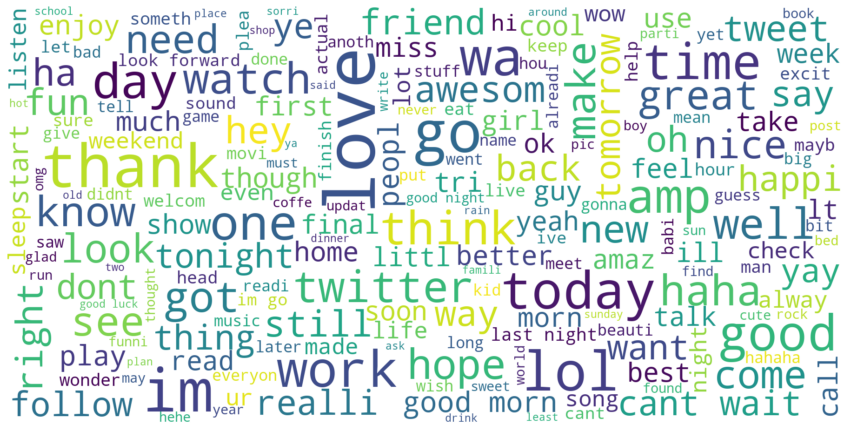

In [218]:
#Positive Sentiment Word Cloud for Generic Tweets

DGPS = GT[GT['sentiment_score'] ==  1 ]
all_words = ' '.join([text for text in DGPS['text']])
wordcloudp = WordCloud(width=1800, height=900, background_color="white", max_font_size=150).generate(all_words)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloudp, interpolation="bilinear")
plt.axis('off')
plt.show()

##### The word cloud above for positve generic tweets is displaying words like "love","great","today" and so on, lets move on to see what the negative sentiment word cloud would display

### Negative Sentiment Word Cloud for Generic Tweets


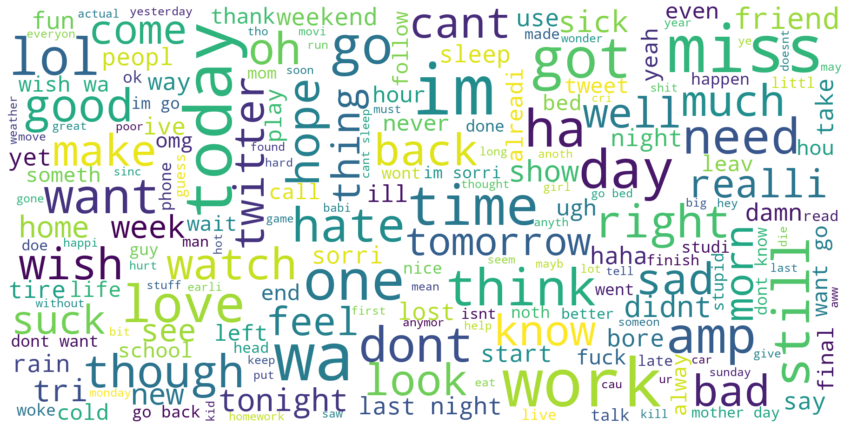

In [219]:
#Negative Sentiment Word Cloud for Generic Tweets

DGNS = GT[GT['sentiment_score'] ==  0 ]
all_words = ' '.join([text for text in DGNS['text']])
wordcloudp = WordCloud(width=1800, height=900, background_color="white", max_font_size=150).generate(all_words)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloudp, interpolation="bilinear")
plt.axis('off')
plt.show()

### Positive Sentiment Word Cloud for Canadian Election Tweets


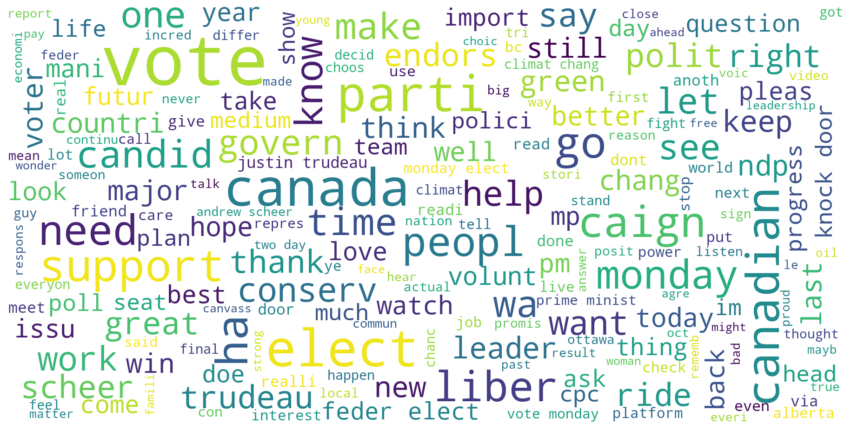

In [117]:
#Positive Sentiment Word Cloud for Election Tweets

DPS = ET[ET['sentiment_score'] ==  1 ]
all_words = ' '.join([text for text in DPS['text']])
wordcloudp = WordCloud(width=1800, height=900, background_color="white", max_font_size=150).generate(all_words)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloudp, interpolation="bilinear")
plt.axis('off')
plt.show()

##### The word cloud above for positve election tweets is displaying words like "trudeau","monday","today" and so on, lets move on to see what the negative sentiment word cloud would display

### Negative Sentiment Word Cloud for Canadian Election Tweets

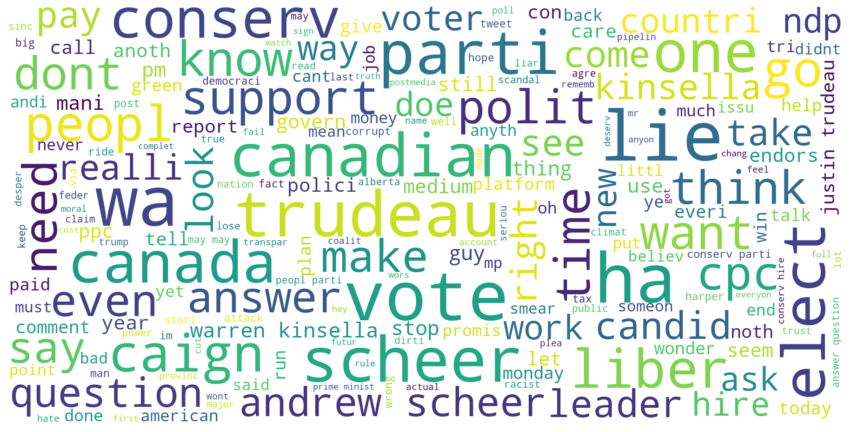

In [99]:
#Negative Sentiment Word Cloud Election Tweets

DNS = ET[ET['sentiment_score'] ==  0 ]
all_words = ' '.join([text for text in DNS['text']])
wordcloudp = WordCloud(width=1800, height=900, background_color="white", max_font_size=150).generate(all_words)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloudp, interpolation="bilinear")
plt.axis('off')
plt.show()

##### The word cloud above for negative election tweets is displaying words like "trudeau" again,"andrew","scheerleader" and so on.

### Word Cloud for Conservative Political Party

In [93]:
Conservative = ET[ET.political_party == 'Conservative']

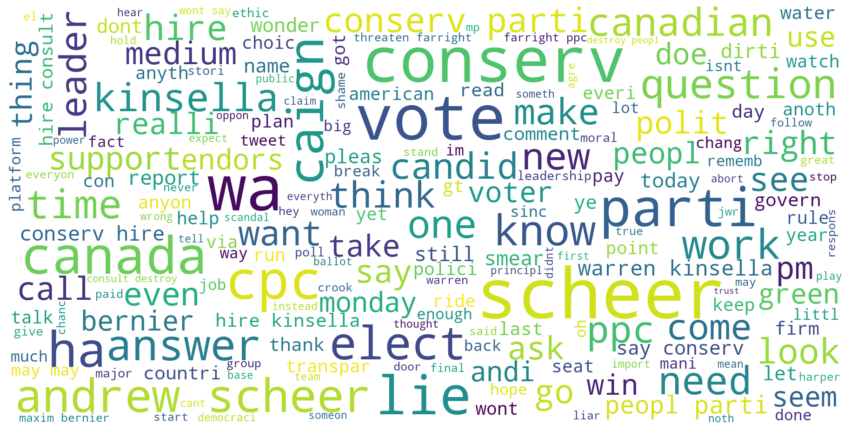

In [120]:
#Word Cloud for Conservative

DCP = ET[ET['political_party'] ==  'Conservative' ]
wordsdcp = ' '.join([text for text in DCP['text']])
wordcloudp = WordCloud(width=1800, height=900, background_color="white", max_font_size=150).generate(wordsdcp)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloudp, interpolation="bilinear")
plt.axis('off')
plt.show()

##### The word cloud above for the Conservative Party is displaying words like "lie" elect,"andrew","scheerleader" and so on.

### Word Cloud for Liberal Party of Canada

In [109]:
Liberal = ET[ET.political_party == 'Liberal']

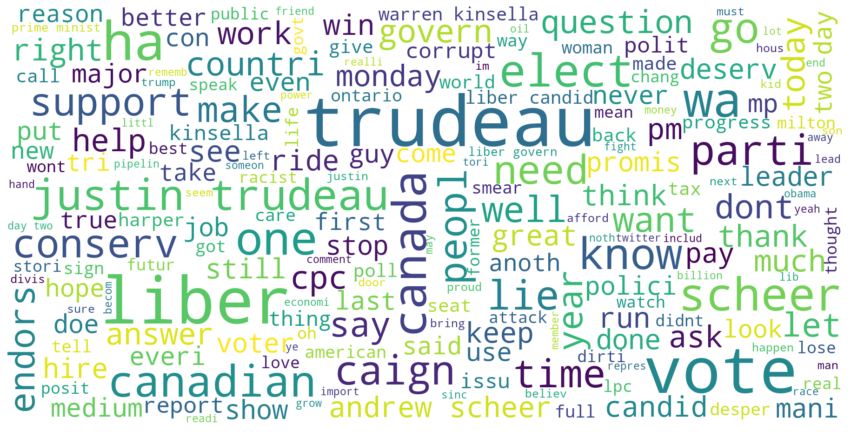

In [121]:
DLP = Liberal[Liberal['political_party'] ==  'Liberal']
wordsdlp = ' '.join([text for text in DLP['text']])
wordcloudp = WordCloud(width=1800, height=900, background_color="white", max_font_size=150).generate(wordsdlp)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloudp, interpolation="bilinear")
plt.axis('off')
plt.show()

##### The word cloud above for the Liberal Party of Canada is displaying words like "trudeau" come,"corrupt","need" and so on.

### Word Cloud for NDP Political Party

In [112]:
New_Democratic_Party = ET[ET.political_party == 'New_Democratic_Party']

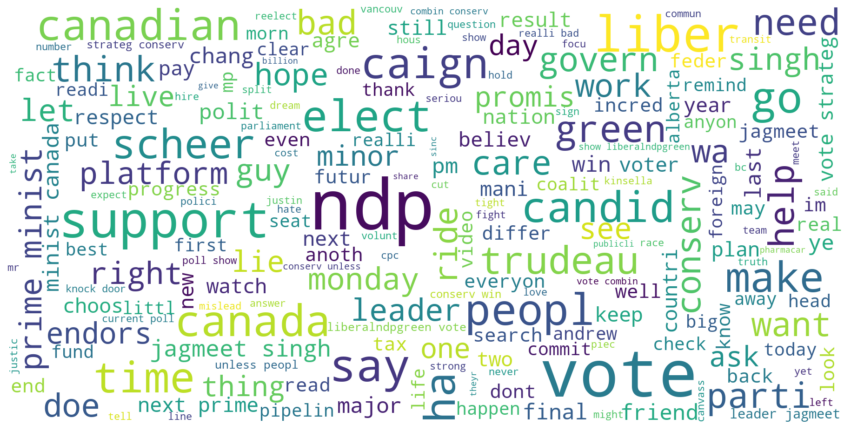

In [123]:
DNDP = New_Democratic_Party[New_Democratic_Party['political_party'] ==  'New_Democratic_Party']
wordsndp = ' '.join([text for text in DNDP['text']])
wordcloudp = WordCloud(width=1800, height=900, background_color="white", max_font_size=150).generate(wordsndp)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloudp, interpolation="bilinear")
plt.axis('off')
plt.show()

##### The word cloud above for the New Democratic Party is displaying words "prime minist","right","corrupt","need" and so on.

### Word Cloud for tweets without affiliation to any political party 

In [125]:
NoneP = ET[ET.political_party == 'None']

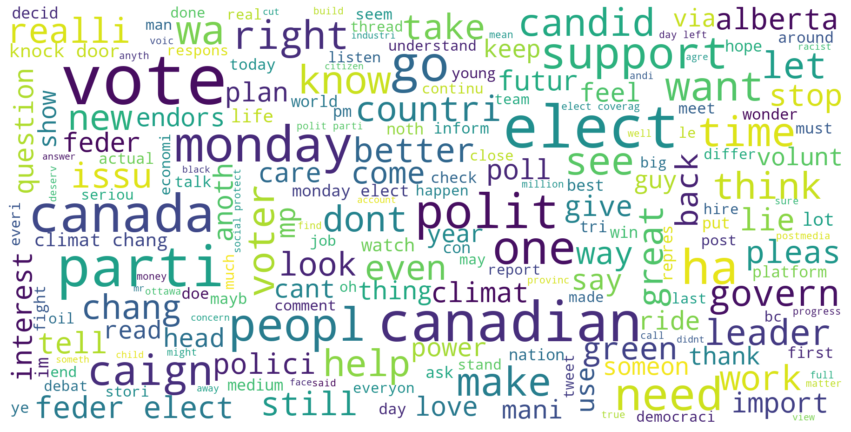

In [126]:
DNP = NoneP[NoneP['political_party'] ==  'None']
wordsn = ' '.join([text for text in DNP['text']])
wordcloudp = WordCloud(width=1800, height=900, background_color="white", max_font_size=150).generate(wordsn)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloudp, interpolation="bilinear")
plt.axis('off')
plt.show()

### The next phase is to visualize the plot of both dataset

# Exploratory Analysis - Visualizations of plots

In [127]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

### Histogram showing the distribution of the lengths of positive and negative tweets in the generic tweets

Text(0.5, 0, 'Length')

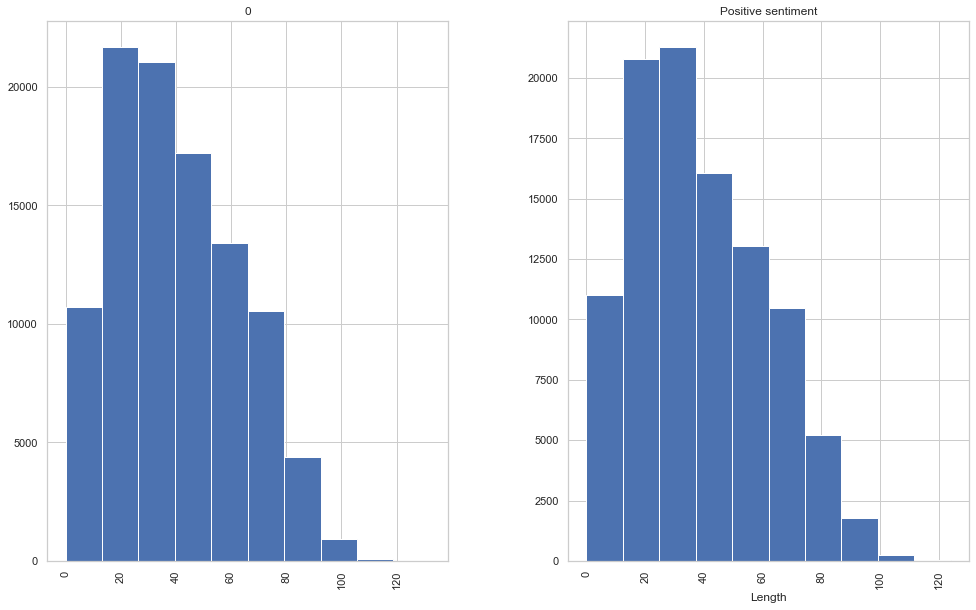

In [445]:
#plotting histogram showing the distribution of positive and negative tweets of the generic tweets
GT.hist('length',by='sentiment_score')
plt.title('Frequency')
plt.title('Positive sentiment')
plt.xlabel('Length')

### The histogram above showing the distribution of the lengths of positive and negative tweets in the generic tweets where 0 = negative sentiment and 1 = positive sentiment

Text(0, 0.5, 'Number of Tweets')

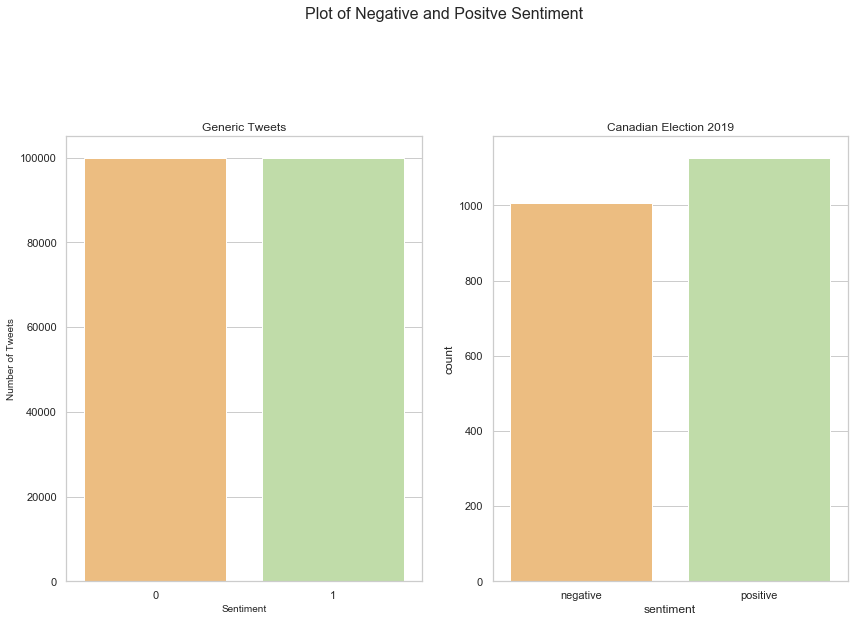

In [434]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
#sns.set_color_codes("Spectral")

plt.figure(2, figsize=(14,18))
the_grid = GridSpec(2, 2)

plt.subplot(the_grid[0, 1],  title='Canadian Election 2019')
sns.countplot(x='sentiment', data=election_text, palette='Spectral')
plt.subplot(the_grid[0, 0], title='Generic Tweets')

sns.countplot(x='class', data=generic_tweets, palette='Spectral')

plt.suptitle('Plot of Negative and Positve Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=10)
plt.ylabel('Number of Tweets', fontsize=10)

Text(0.5, 1.0, 'Distribution of the political party affiliations of the election tweets')

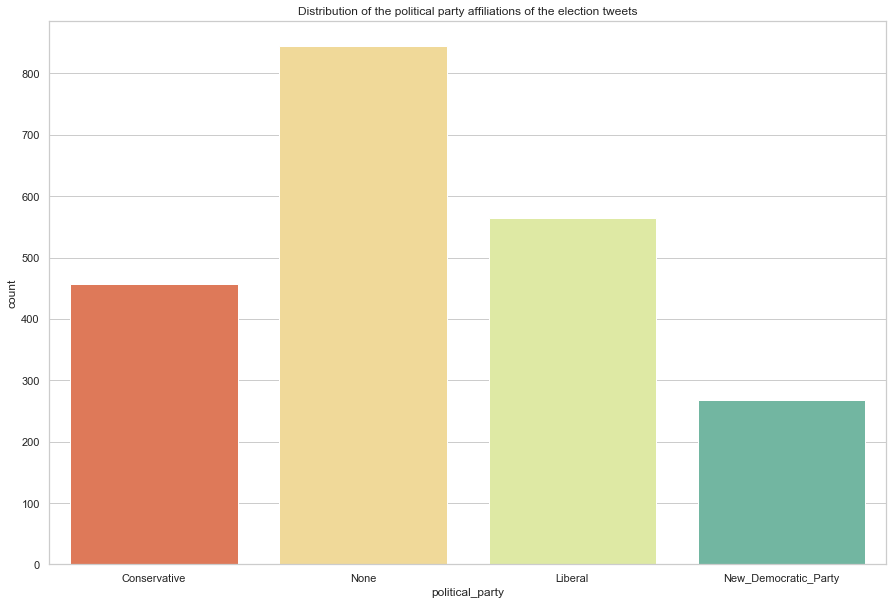

In [234]:
fig, ax = plt.subplots(figsize=(15,10))
plot = sns.countplot(x = 'political_party', data = ET, ax=ax,palette='Spectral')
plt.title('Distribution of the political party affiliations of the election tweets')

#### From the distribution of the political party affiliations above, the Liberal Party of Canada was the most frequent party on tweeted about on twitter, followed closely by the conserative and then the New Democratic Party. This was expected as the Liberal party was in power at the time in 2019, the presidential candidate Justin Trudeau was running for secord time as the prime minister.

### Political party sentiment distribution

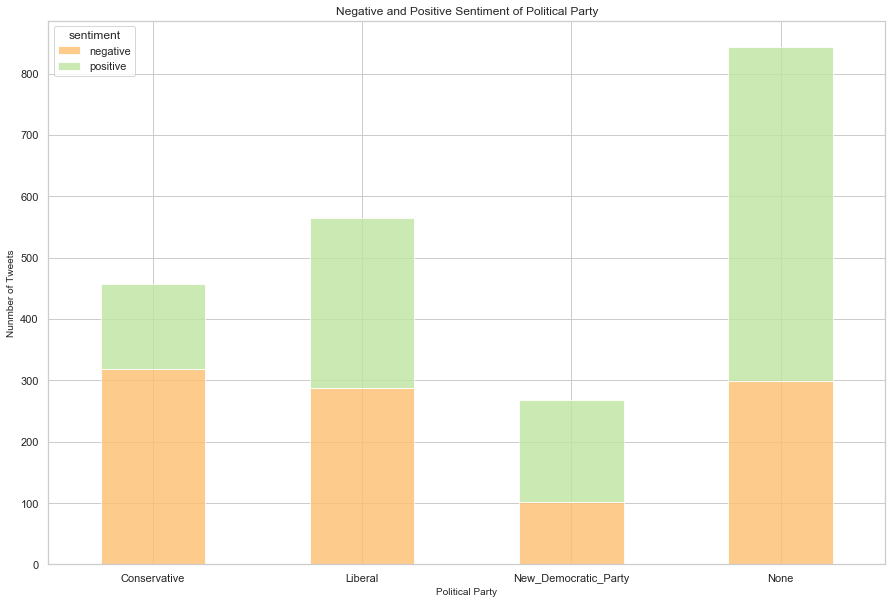

In [222]:

pal = sns.color_palette("Spectral", 2)
pd.crosstab(index = election_text["political_party"],columns = ET["sentiment"]).plot(kind='bar',
                figsize=(15, 10),alpha=0.8,rot=0,stacked=True,title="Negative and Positive Sentiment of Political Party",colors=pal)
plt.xlabel('Political Party', fontsize=10)
plt.ylabel('Nunmber of Tweets', fontsize=10)
sns.set(style="whitegrid")

#### The sentiment  plot for the political parties above shows that the out of the three political parties, only the New Democratic Party has a significant amount of positive sentiment to negative sentiment ratio, although the sample size is extremely low compared to the Conservative and Liberal Party of Canada. On the other hand, the Conservative party have a tremendous amount of negative sentiment while the Liberal party of Caanda almost have an even balance of negative and positive sentiment

### Barplot showing the plot of negative reason in the Canadian Election tweets

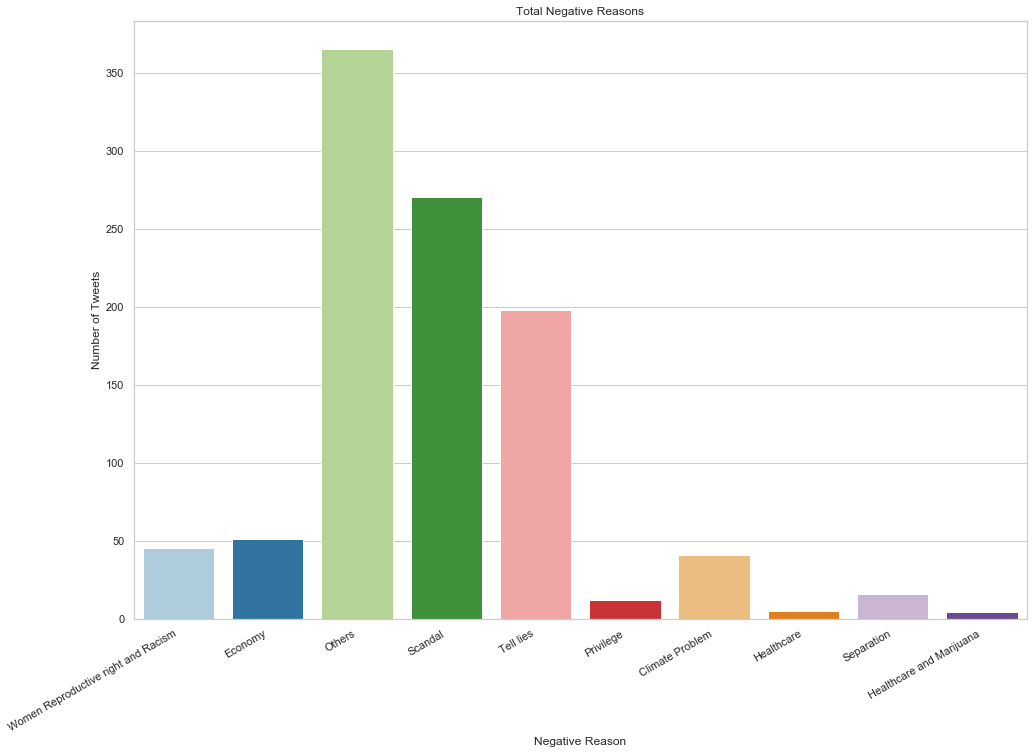

In [256]:
# Barplot illustration showing; 
ax = sns.countplot(x="negative_reason", data=ET, palette="Paired")

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
sns.set(rc={'figure.figsize':(16,10)})
plt.title('Total Negative Reasons')
plt.xlabel('Negative Reason')
plt.ylabel('Number of Tweets')
sns.set(style="whitegrid")
plt.show()

### Negative reasons by Political party

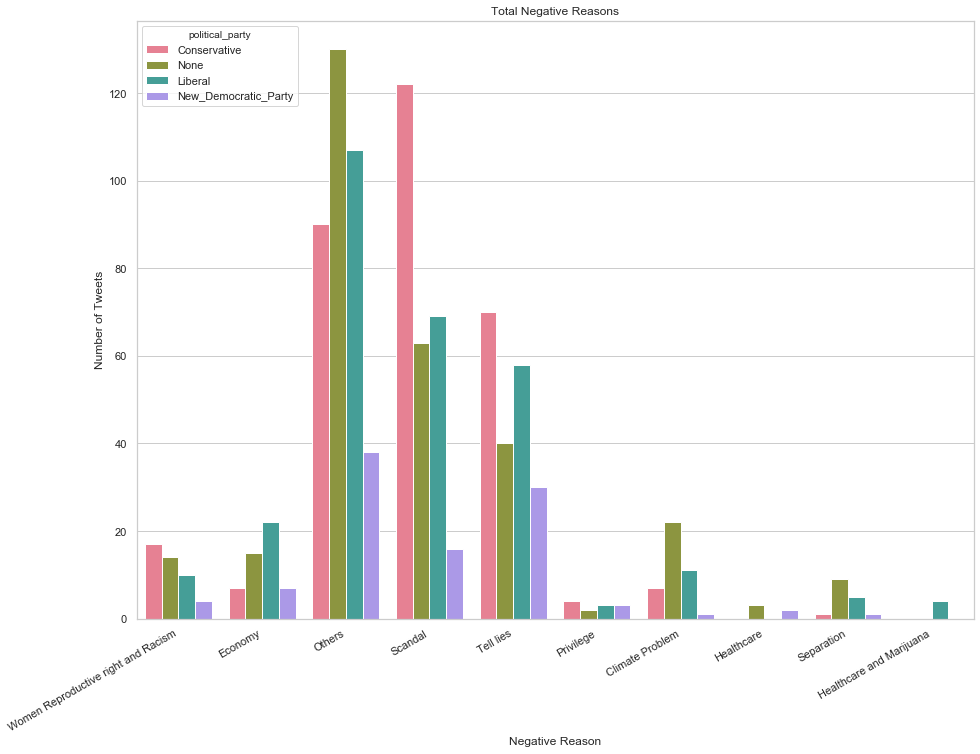

In [255]:
# Barplot illustration showing; Negative reasons by Political party
ax = sns.countplot(x="negative_reason",hue = 'political_party', data=ET, palette="husl")

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
sns.set(rc={'figure.figsize':(16,11)})
plt.title('Total Negative Reasons')
plt.xlabel('Negative Reason')
plt.ylabel('Number of Tweets')
sns.set(style="whitegrid")
plt.show()

# MODEL PREPARATION

## TD-IDF

#### Term frequency method is used to reduce influence of a document length. TF-IDF works by penalizing the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

#### Important terms related to TF-IDF:

#### TF = (Number of times word t appears in a document)/(Number of word in the document) IDF = log(N/n), 
#### where, N is the number of documents and n is the number of documents a term t has appeared in. TF-IDF = TF*IDF

In [142]:
vectorizerT = TfidfVectorizer(use_idf=False,max_features = 700, norm="l1")
array_T = vectorizerT.fit_transform(GT['text']).toarray()

In [143]:
X= pd.DataFrame(array_T)
y= GT['sentiment_score']

#### In this model, Generic Tweets is splitted it into 70% training and 30% testing set.

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

## Logistic Resression

#### There are different types of Logistic Regression, which are:

#### 1. Binary Logistic Regression

#### 2. Multinomial Logistic Regression

#### 3. Ordinal Logistic Regression

#### Logistic regression is a machine learning classification algorithm used to predict the probability of a categorical dependent variable and it is one of the most common ways to fit models for categorical data.

In [153]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)#,multi_class='multinomial'
ypred = clf.predict(X_test)

print(classification_report(y_test,ypred))
print(clf.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73     29868
           1       0.73      0.76      0.75     30132

    accuracy                           0.74     60000
   macro avg       0.74      0.74      0.74     60000
weighted avg       0.74      0.74      0.74     60000

0.7394166666666667


## Naive Bayes

#### Naive Bayes is a classification method based on Bayes’ Theorem with an assumption of independence among predictors. Here, the classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

#### Advantages
#### a. It is good for multi class prediction
#### b. It perform well in case of categorical input variables compared to numerical variables

#### Disadvantages
#### a. It is known as a bad estimator for multi class prediction.
##### https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

In [178]:
NaiveB = MultinomialNB()
NaiveB.fit(X_train, y_train)

pred = NaiveB.predict(X_test)
print(classification_report(y_test,pred))
print("Accuracy:",metrics.accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73     29868
           1       0.74      0.71      0.72     30132

    accuracy                           0.73     60000
   macro avg       0.73      0.73      0.73     60000
weighted avg       0.73      0.73      0.73     60000

Accuracy: 0.7299


## Random Forest

#### These are bagged decision tree models that split on a subset of attributes on each split.
#### Advantages
#### a. The feature importance estimate provided are reliable.
#### b. The predictive performance is outstanding.

#### Disadvantages
#### a. It is a CPU intensive operation as it computationally expensive especially when training a large number of deep trees
#### b. Although the predictive performance is outstanding, the predictions are slower
##### https://towardsdatascience.com/why-random-forest-is-my-favorite-machine-learning-model-b97651fa3706

In [185]:
RandomF = RandomForestClassifier(n_estimators=10, random_state=0)
RandomF.fit(X_train, y_train)
predict = RandomF.predict(X_test)

print(classification_report(y_test,predict))
print("Accuracy:",metrics.accuracy_score(y_test, predict))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73     29868
           1       0.73      0.71      0.72     30132

    accuracy                           0.72     60000
   macro avg       0.72      0.72      0.72     60000
weighted avg       0.72      0.72      0.72     60000

Accuracy: 0.7225333333333334


## Decision Tree


#### A decision tree is a flowchart-like tree structure where the branches illustrate a decision rule, there are leaf nodes, each leaf node represents the outcome,  where an internal node represents attribute.
#### Advantage
#### a. It is not computationally expensive as the computation time is brief.
#### b. Decision Tree has less parameters to tune. 

#### Disadvantage
#### a. They are unstable, a minor change in the dataset can lead to a drastic change in the structure of the decision tree.
#### b. When dealing with a lot of un-correlated variables, decision tree do not function at it most.
##### Source: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

In [187]:
DecisionT = DecisionTreeClassifier(criterion="gini",random_state=3)
DecisionT.fit(X_train,y_train)
y_pred = DecisionT.predict(X_test)

print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68     29868
           1       0.68      0.70      0.69     30132

    accuracy                           0.69     60000
   macro avg       0.69      0.69      0.69     60000
weighted avg       0.69      0.69      0.69     60000

Accuracy: 0.6874333333333333


## Support Vector Machine

#### Support vectors are data points that are closer to the hyperplane and affects the position and of the hyperplane. Hyperplanes are decision boundaries that help classify the data points. 
#### Advantage
#### a. They have simple decision boundary as they have no issue with overfitting the model.
#### b. Support vector machines are helpful in text and hypertext categorization.

#### Disadvantage
#### a. They are for real valued feature (no categorical ones).
#### b. key parameters  need to be set correctly to attain the best classification results.

##### Source: https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

In [190]:
SVM = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None)
SVM.fit(X_train, y_train)  

prediction = SVM.predict(X_test)
print(classification_report(y_test,prediction))
print(SVM.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.67      0.79      0.72     29868
           1       0.75      0.61      0.67     30132

    accuracy                           0.70     60000
   macro avg       0.71      0.70      0.70     60000
weighted avg       0.71      0.70      0.70     60000

0.6997833333333333


## K- Nearest Neighbour

#### K-Nearest Neighbour classifier is a simple classification algorithm whose purpose is to use a database in which the data points are segregated into several category in order to predict the classification of a new sample.
#### Advantage
#### a. It can be used for classification or regression
#### b. It is a simple algorithm that is easy to explain, understand and interpret

#### Disadvantage
#### a.It is a CPU intensive operation as it computationally expensive, took about 3 hours to run this
#### b.It can be very slow to compute if there are a large number of training examples.
##### Source: http://www.nickgillian.com/wiki/pmwiki.php/GRT/KNN

##### Took ~3hours to run

In [197]:
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)

# print(classification_report(y_test,y_pred))
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.60      0.63     29868
           1       0.64      0.70      0.67     30132

    accuracy                           0.65     60000
   macro avg       0.65      0.65      0.65     60000
weighted avg       0.65      0.65      0.65     60000

Accuracy: 0.6519666666666667


## XGBoost

In [199]:
XG = XGBClassifier()
XG.fit(X_train,y_train) 

predict_test = XG.predict(X_test)
print(classification_report(y_test,predict_test))
print("Accuracy:",metrics.accuracy_score(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.78      0.53      0.63     29868
           1       0.65      0.85      0.73     30132

    accuracy                           0.69     60000
   macro avg       0.71      0.69      0.68     60000
weighted avg       0.71      0.69      0.68     60000

Accuracy: 0.6911833333333334


## BAG OF WORDS

#### Bag of Words is a way to extract features from text documents. These features can be used for training machine learning model. It creates a vocabulary of unique words occurring in all the documents in the training set.

###### https://www.freecodecamp.org/news/an-introduction-to-bag-of-words-and-how-to-code-it-in-python-for-nlp-282e87a9da04/

In [204]:
vectorizerB = CountVectorizer(max_features = 700)
array_B = vectorizerB.fit_transform(GT['text']).toarray()

In [206]:
X = pd.DataFrame(array_B)
y = GT['sentiment_score']

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Logistic Resression

In [293]:
clfB = LogisticRegression(random_state=42).fit(X_train, y_train)#,multi_class='multinomial'
ypred = clfB.predict(X_test)
print(classification_report(y_test,ypred))
print(clfB.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73     29851
           1       0.73      0.79      0.75     30149

    accuracy                           0.74     60000
   macro avg       0.75      0.74      0.74     60000
weighted avg       0.75      0.74      0.74     60000

0.7439333333333333


## Naive Bayes

In [209]:
NaiveB2 = MultinomialNB()
NaiveB2.fit(X_train, y_train)

pred = NaiveB2.predict(X_test)
print(classification_report(y_test,pred))
print("Accuracy:",metrics.accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74     29851
           1       0.74      0.71      0.73     30149

    accuracy                           0.73     60000
   macro avg       0.73      0.73      0.73     60000
weighted avg       0.73      0.73      0.73     60000

Accuracy: 0.7304


## Random Forest

In [210]:
RandomF2 = RandomForestClassifier(n_estimators=10, random_state=0)
RandomF2.fit(X_train, y_train)
predict = RandomF2.predict(X_test)

print(classification_report(y_test,predict))
print("Accuracy:",metrics.accuracy_score(y_test, predict))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72     29851
           1       0.72      0.71      0.71     30149

    accuracy                           0.72     60000
   macro avg       0.72      0.72      0.72     60000
weighted avg       0.72      0.72      0.72     60000

Accuracy: 0.7154833333333334


## Decision Tree

In [212]:
DecisionT2 = DecisionTreeClassifier(criterion="gini",random_state=3)
DecisionT2.fit(X_train,y_train)
y_pred = DecisionT2.predict(X_test)

print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68     29851
           1       0.68      0.68      0.68     30149

    accuracy                           0.68     60000
   macro avg       0.68      0.68      0.68     60000
weighted avg       0.68      0.68      0.68     60000

Accuracy: 0.6783166666666667


## Support Vector Machine

In [214]:
SVM2 = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None)
SVM2.fit(X_train, y_train)  

prediction = SVM2.predict(X_test)
print(classification_report(y_test,prediction))
print(SVM2.score(X_test, y_test))


              precision    recall  f1-score   support

           0       0.76      0.69      0.73     29851
           1       0.72      0.78      0.75     30149

    accuracy                           0.74     60000
   macro avg       0.74      0.74      0.74     60000
weighted avg       0.74      0.74      0.74     60000

0.7386166666666667


## XGBoost

In [215]:
XG2 = XGBClassifier()
XG2.fit(X_train,y_train) 

predict_test = XG2.predict(X_test)
print(classification_report(y_test,predict_test))
print("Accuracy:",metrics.accuracy_score(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.78      0.54      0.64     29851
           1       0.65      0.85      0.74     30149

    accuracy                           0.69     60000
   macro avg       0.71      0.69      0.69     60000
weighted avg       0.71      0.69      0.69     60000

Accuracy: 0.69335


## KNN

##### Took ~3hours to run

In [216]:
# knn2 = KNeighborsClassifier(n_neighbors=5)
# knn2.fit(X_train, y_train)
# y_pred = knn2.predict(X_test)

# print(classification_report(y_test,y_pred))
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.63      0.65     29851
           1       0.66      0.71      0.68     30149

    accuracy                           0.67     60000
   macro avg       0.67      0.67      0.67     60000
weighted avg       0.67      0.67      0.67     60000

Accuracy: 0.67015


In [411]:
Model = ['Logistic Regression', 'Naive Bayes','Decission Tree', 'Random Forest','Support Vector Machine','XGBoost', 'KNN']
TD_IDF = [0.739,0.729,0.723,0.687,0.700,0.691,0.652] 
Bag_of_words = [0.744,0.730,0.715,0.678,0.739,0.693,0.670]

models= pd.DataFrame({'Model':Model,'TD-IDF':TD_IDF,'Bag_of_words':Bag_of_words,})
models

Model  TD-IDF  Bag_of_words
0     Logistic Regression   0.739         0.744
1             Naive Bayes   0.729         0.730
2          Decission Tree   0.723         0.715
3           Random Forest   0.687         0.678
4  Support Vector Machine   0.700         0.739
5                 XGBoost   0.691         0.693
6                     KNN   0.652         0.670

##### As shown above, the Logistic Regression had the best accuracy for both TD-IDF and Bag of words with 73.9% and 74.4% respectively

## Best accuracy for TD-IDF 

In [510]:
vectorizerG = TfidfVectorizer(use_idf=False,max_features = 700, norm="l1")
ETX1= vectorizerG.fit_transform(ET.text).toarray()

In [511]:
LX= pd.DataFrame(array_T)
Ly= GT['sentiment_score']
clfD = LogisticRegression(random_state=0).fit(LX, Ly)
G= clfD.predict(ETX1)
print(classification_report(ET['sentiment_score'],G))
print("Accuracy:",metrics.accuracy_score(ET['sentiment_score'], Lpredd))

              precision    recall  f1-score   support

           0       0.49      0.53      0.51      1006
           1       0.54      0.50      0.52      1127

    accuracy                           0.51      2133
   macro avg       0.51      0.51      0.51      2133
weighted avg       0.52      0.51      0.51      2133

Accuracy: 0.5138302859821847


## Best accuracy for Bag of Words 

In [475]:
vectorizerB = CountVectorizer(max_features = 700)
ETX= vectorizerB.fit_transform(ET['text']).toarray()

In [533]:
BX = pd.DataFrame(array_B)
By = GT['sentiment_score']
clfBB = LogisticRegression(random_state=42).fit(BX, By)#,multi_class='multinomial'
Bpred= clfBB.predict(ETX)
print(classification_report(ET['sentiment_score'],Bpred))
print("Accuracy:",metrics.accuracy_score(ET['sentiment_score'], Bpred))

              precision    recall  f1-score   support

           0       0.50      0.57      0.53      1006
           1       0.56      0.49      0.52      1127

    accuracy                           0.53      2133
   macro avg       0.53      0.53      0.53      2133
weighted avg       0.53      0.53      0.53      2133

Accuracy: 0.5278949835911861


### Using best accuracy for Bag of words

## Predictions match  for the sentiment labelled in the 2019 Canadian elections data

In [534]:
ET['predicted'] = Bpred

In [535]:
ET

sentiment                      negative_reason  \
0     negative  Women Reproductive right and Racism   
1     positive                                  NaN   
2     negative                              Economy   
3     positive                                  NaN   
4     negative                              Economy   
...        ...                                  ...   
2128  negative                              Scandal   
2129  negative                              Scandal   
2130  positive                                  NaN   
2131  negative  Women Reproductive right and Racism   
2132  positive                                  NaN   

                                                                                                                      text  \
0                                               instead suggest agre trust govern protect woman right automoni bodi let go   
1                                                                                                                     real   
2                                                                                     go cost billion next year ask justin   
3                                                                                                          cant decid help   
4                                          sick tire hard earn donat corpor welfar bum dont need one mani reason leav care   
...                                                                                                                    ...   
2128      know wa enough job smear caign right bernier file complaint elect watchdog profession smear caign parti cbc news   
2129  miss comment deflect issu doe answer best respons like agent gave ask wa hire guess matter go bad wors anoth deflect   
2130                                                                                      daili remind endors strateg vote   
2131                                                                                          yupnot go reopen abort debat   
2132                                                                                                                  zing   

           political_party  sentiment_score  predicted  
0             Conservative                0          0  
1                     None                1          0  
2                  Liberal                0          1  
3                     None                1          0  
4                  Liberal                0          1  
...                    ...              ...        ...  
2128          Conservative                0          0  
2129          Conservative                0          0  
2130  New_Democratic_Party                1          1  
2131          Conservative                0          1  
2132  New_Democratic_Party                1          1  

[2133 rows x 6 columns]

In [537]:
Conserv = ET[ET['political_party']=='Conservative']

In [ ]:
Liber = ET[ET['political_party']=='Liberal']

In [538]:
NDP = ET[ET['political_party']=='New_Democratic_Party']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13868bc50>,
      dtype=object)

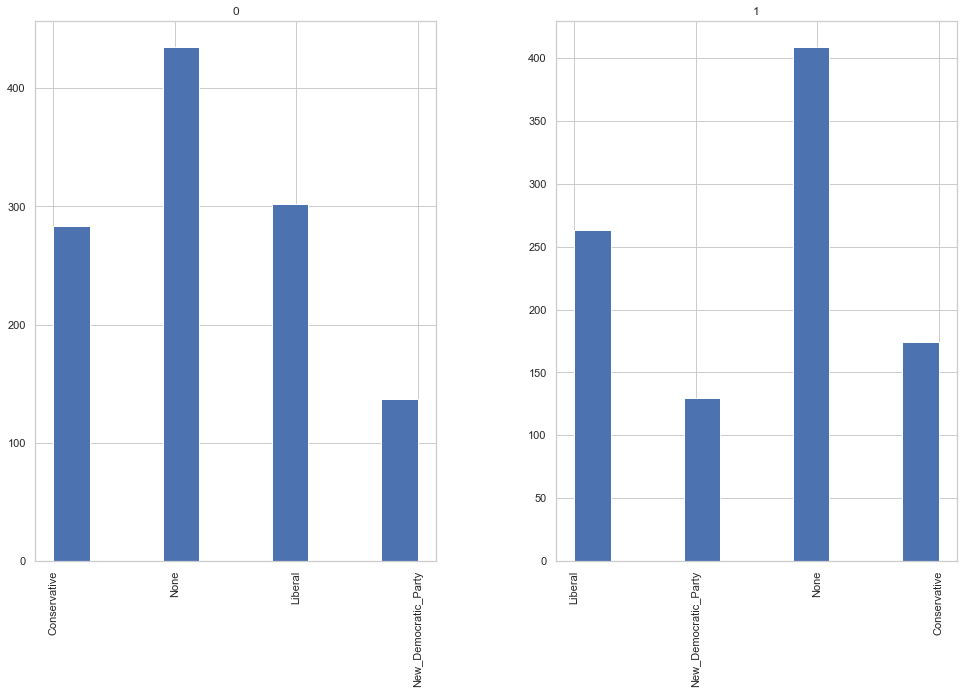

In [539]:
ET.hist('political_party',by='predicted')

#### Plotting the predicted sentiment by the model

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

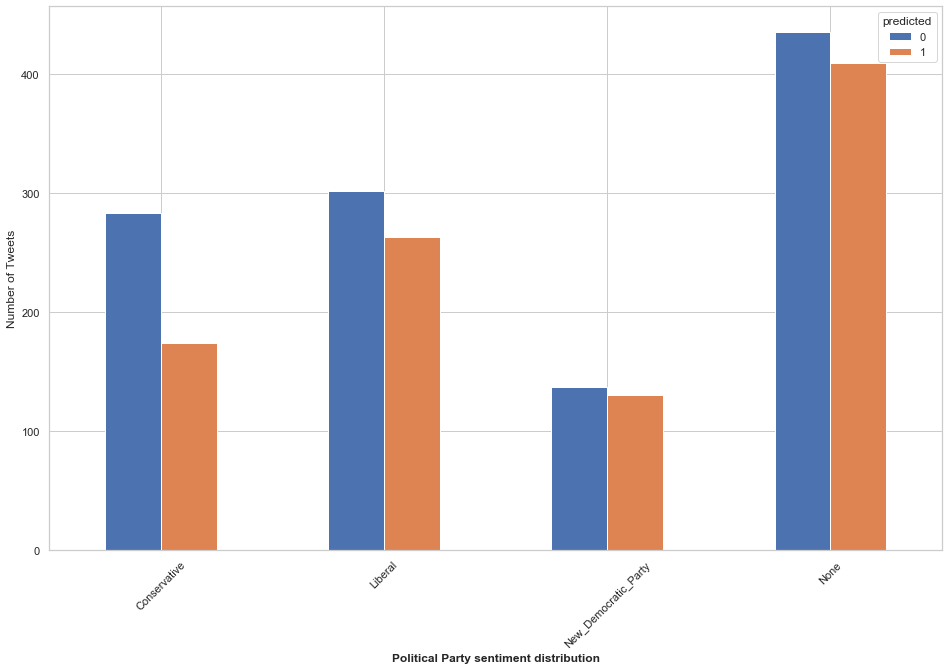

In [574]:
ET.groupby(['political_party', 'predicted']).size().unstack().plot(kind='bar')
plt.xlabel('Political Party sentiment distribution',fontweight='bold')
plt.ylabel('Number of Tweets')
plt.xticks( rotation=45)

# MODEL IMPLEMENTATION

#### Creating a new dataframe for Negative reason

In [366]:
Neg_reas = ET[ET['sentiment_score']==0]

In [367]:
Neg_reas

sentiment                      negative_reason  \
0     negative  Women Reproductive right and Racism   
2     negative                              Economy   
4     negative                              Economy   
5     negative                               Others   
8     negative                               Others   
...        ...                                  ...   
2125  negative                               Others   
2126  negative                      Climate Problem   
2128  negative                              Scandal   
2129  negative                              Scandal   
2131  negative  Women Reproductive right and Racism   

                                                                                                                         text  \
0                                                  instead suggest agre trust govern protect woman right automoni bodi let go   
2                                                                                        go cost billion next year ask justin   
4                                             sick tire hard earn donat corpor welfar bum dont need one mani reason leav care   
5     fact introduc end longgun registri even though head polic across canada victim group object crime control public safeti   
8                                                                         canada dont make america mistak full frontal tb via   
...                                                                                                                       ...   
2125                                                                                              supervillain elect fail job   
2126   care limit wonder parti vote climat scientist delin six main parti propos term climat polici tell one actual cut emiss   
2128         know wa enough job smear caign right bernier file complaint elect watchdog profession smear caign parti cbc news   
2129     miss comment deflect issu doe answer best respons like agent gave ask wa hire guess matter go bad wors anoth deflect   
2131                                                                                             yupnot go reopen abort debat   

     political_party  sentiment_score  
0       Conservative                0  
2            Liberal                0  
4            Liberal                0  
5       Conservative                0  
8            Liberal                0  
...              ...              ...  
2125            None                0  
2126            None                0  
2128    Conservative                0  
2129    Conservative                0  
2131    Conservative                0  

[1006 rows x 5 columns]

In [368]:
vectorizer2 = CountVectorizer(max_features = 700)
array_F = vectorizer2.fit_transform(Neg_reas.text).toarray()

In [369]:
y = Neg_r['negative_reason']

In [370]:
X_train, X_test, y_train, y_test = train_test_split(array_F, y, test_size=0.30, random_state=42)

In [371]:
X_train.shape

(704, 700)

### XGBoost

In [358]:
XG3 = XGBClassifier()
XG3.fit(X_train,y_train) 

predict_test = XG3.predict(X_test)
print(classification_report(y_test,predict_test))
print("Accuracy:",metrics.accuracy_score(y_test, predict_test))

                                     precision    recall  f1-score   support

                    Climate Problem       1.00      0.42      0.59        19
                            Economy       1.00      0.30      0.46        10
                         Healthcare       0.00      0.00      0.00         2
                             Others       0.55      0.92      0.69       119
                          Privilege       0.00      0.00      0.00         3
                            Scandal       0.72      0.49      0.59        73
                         Separation       0.50      0.25      0.33         4
                          Tell lies       0.88      0.45      0.60        64
Women Reproductive right and Racism       1.00      0.75      0.86         8

                           accuracy                           0.64       302
                          macro avg       0.63      0.40      0.46       302
                       weighted avg       0.71      0.64      0.62       3

## Random Forest

In [357]:
RandomF3 = RandomForestClassifier(n_estimators=10, random_state=0)
RandomF3.fit(X_train, y_train)
predict = RandomF3.predict(X_test)

print(classification_report(y_test,predict))
print("Accuracy:",metrics.accuracy_score(y_test, predict))

                                     precision    recall  f1-score   support

                    Climate Problem       1.00      0.37      0.54        19
                            Economy       0.33      0.30      0.32        10
                         Healthcare       0.00      0.00      0.00         2
                             Others       0.60      0.76      0.67       119
                          Privilege       0.00      0.00      0.00         3
                            Scandal       0.53      0.58      0.55        73
                         Separation       1.00      0.25      0.40         4
                          Tell lies       0.69      0.52      0.59        64
Women Reproductive right and Racism       1.00      0.62      0.77         8

                           accuracy                           0.60       302
                          macro avg       0.57      0.38      0.43       302
                       weighted avg       0.62      0.60      0.59       3

### Logistic Regression

In [359]:
Mclf = LogisticRegression(multi_class='multinomial',solver='lbfgs',random_state=0).fit(X_train, y_train)
ypred = Mclf.predict(X_test)

print(classification_report(y_test,ypred))
print("Accuracy:",Mclf.score(X_test, y_test))

                                     precision    recall  f1-score   support

                    Climate Problem       1.00      0.37      0.54        19
                            Economy       0.40      0.40      0.40        10
                         Healthcare       0.00      0.00      0.00         2
                             Others       0.57      0.75      0.64       119
                          Privilege       0.00      0.00      0.00         3
                            Scandal       0.58      0.55      0.56        73
                         Separation       1.00      0.25      0.40         4
                          Tell lies       0.55      0.45      0.50        64
Women Reproductive right and Racism       0.60      0.38      0.46         8

                           accuracy                           0.57       302
                          macro avg       0.52      0.35      0.39       302
                       weighted avg       0.58      0.57      0.56       3

### Naive Bayes

In [353]:
NaiveB3 = MultinomialNB()
NaiveB3.fit(X_train, y_train)

pred = NaiveB3.predict(X_test)
print(classification_report(y_test,pred))
print("Accuracy:",metrics.accuracy_score(y_test, pred))

                                     precision    recall  f1-score   support

                    Climate Problem       1.00      0.32      0.48        19
                            Economy       0.29      0.50      0.37        10
                         Healthcare       0.00      0.00      0.00         2
                             Others       0.59      0.57      0.58       119
                          Privilege       0.00      0.00      0.00         3
                            Scandal       0.54      0.62      0.57        73
                         Separation       0.50      0.25      0.33         4
                          Tell lies       0.49      0.52      0.50        64
Women Reproductive right and Racism       0.33      0.38      0.35         8

                           accuracy                           0.53       302
                          macro avg       0.42      0.35      0.35       302
                       weighted avg       0.55      0.53      0.53       3

### Support Vector Machine

In [364]:
SVM3 = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None)
SVM3.fit(X_train, y_train)  

prediction = SVM3.predict(X_test)
print(classification_report(y_test,prediction))
print("Accuracy:",SVM3.score(X_test, y_test))


                                     precision    recall  f1-score   support

                    Climate Problem       0.86      0.32      0.46        19
                            Economy       0.35      0.60      0.44        10
                         Healthcare       0.00      0.00      0.00         2
                             Others       0.64      0.49      0.56       119
                          Privilege       0.00      0.00      0.00         3
                            Scandal       0.44      0.73      0.55        73
                         Separation       1.00      0.25      0.40         4
                          Tell lies       0.55      0.50      0.52        64
Women Reproductive right and Racism       0.50      0.38      0.43         8

                           accuracy                           0.53       302
                          macro avg       0.48      0.36      0.37       302
                       weighted avg       0.57      0.53      0.52       3

Model Tuning

In [560]:
vectorizer = CountVectorizer(max_features = 4500)
array_WF = vectorizer.fit_transform(GT['text']).toarray()

In [566]:
X = array_WF
y = GT['sentiment_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [562]:
# from sklearn.linear_model import LogisticRegressionCV
# model = LogisticRegressionCV(Cs= [0.01,0.1,0.5,1,10] ,cv=3, random_state=42).fit(X_train, y_train)

In [563]:
C = clf.C

In [564]:
C

1.0

### Using the best 'C' as 1

In [569]:
# model2 = LogisticRegression(C=1,random_state=42).fit(X_train, y_train)
# ypred = model2.predict(X_test)
# print(classification_report(y_test,ypred))
# print(model2.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76     29851
           1       0.75      0.79      0.77     30149

    accuracy                           0.77     60000
   macro avg       0.77      0.76      0.76     60000
weighted avg       0.77      0.77      0.76     60000

0.765


In [570]:
vectorizer = CountVectorizer(max_features = 4500)
array_WF = vectorizer.fit_transform(ET['text']).toarray()

In [572]:
pred = model2.predict(array_WF)
print(classification_report(ET['sentiment_score'],pred))
print(model2.score(array_WF,ET['sentiment_score']))

              precision    recall  f1-score   support

           0       0.50      0.48      0.49      1006
           1       0.55      0.56      0.56      1127

    accuracy                           0.52      2133
   macro avg       0.52      0.52      0.52      2133
weighted avg       0.52      0.52      0.52      2133

0.5241443975621191


In [413]:

Model = ['XGBoost','Random Forest','Logistic Regression', 'Naive Bayes', 'Support Vector Machine']
Accuracy = [0.639,0.603,0.573,0.533,0.526] 


models= pd.DataFrame({'Model':Model,'Accuracy':Accuracy})
models

Model  Accuracy
0                 XGBoost     0.639
1           Random Forest     0.603
2     Logistic Regression     0.573
3             Naive Bayes     0.533
4  Support Vector Machine     0.526

#### From the dataframe above, it shows how the model performed in relation to one another as XGBoost having the highest accuracy and support vector machine having the least accurac. This might be because support vector machines perform better when used for real valued feature not categorical ones

## Bonus (Neural Networks)

#### Neural networks are multi-layer networks of neuron that we use to classify things, make predictions.Neural networks can be used for classification problem as well as regression problems. They are can of extract features that are fed to other algorithms for clustering and classification.
##### https://towardsdatascience.com/understanding-neural-networks-19020b758230

## Multi-layer Perceptron (MLP)

#### Multi-layer Perceptron is a supervised learning algorithm that learns a function by training on a dataset, where is the number of dimensions for input and is the number of dimensions for output.
#### Advantages
#### a.  It can learn a non-linear function approximator for either classification or regression

#### Disadvantages
#### a.MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.
#### b. MLP is sensitive to feature scaling


#### c. MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.
##### Source: https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [385]:
from sklearn.neural_network import MLPClassifier
MLP= MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
MLP.fit(X_train, y_train)  

prediction = MLP.predict(X_test)
print(classification_report(y_test,prediction))
print("Accuracy:",MLP.score(X_test, y_test))

                                     precision    recall  f1-score   support

                    Climate Problem       0.20      0.11      0.14        19
                            Economy       0.17      0.30      0.21        10
                         Healthcare       0.00      0.00      0.00         2
                             Others       0.52      0.55      0.54       119
                          Privilege       0.00      0.00      0.00         3
                            Scandal       0.48      0.47      0.47        73
                         Separation       0.00      0.00      0.00         4
                          Tell lies       0.53      0.33      0.40        64
Women Reproductive right and Racism       0.03      0.12      0.04         8

                           accuracy                           0.42       302
                          macro avg       0.21      0.21      0.20       302
                       weighted avg       0.45      0.42      0.43       3

# RESULTS

### How political party is viewed in the public eye based on the sentiment value

In [275]:
partysentiment=pd.crosstab(ET.political_party, ET.sentiment)

In [276]:
partysentiment

sentiment             negative  positive
political_party                         
Conservative               318       139
Liberal                    288       277
New_Democratic_Party       102       165
None                       298       546

In [278]:
partysentiment2 = partysentiment[:-1]

In [279]:
partysentiment2

sentiment             negative  positive
political_party                         
Conservative               318       139
Liberal                    288       277
New_Democratic_Party       102       165

In [280]:
percentagepartysentiment=partysentiment2.apply(lambda a: a / a.sum() * 100, axis=1)
percentagepartysentiment

sentiment              negative   positive
political_party                           
Conservative          69.584245  30.415755
Liberal               50.973451  49.026549
New_Democratic_Party  38.202247  61.797753

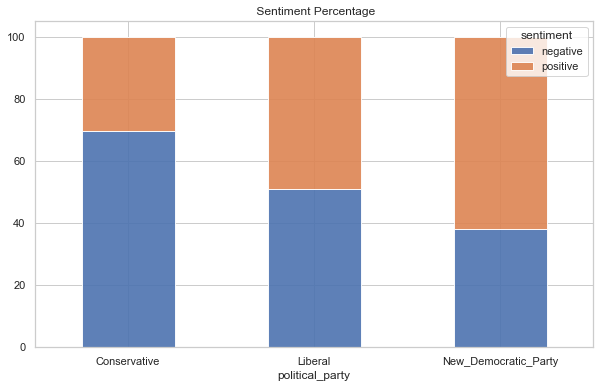

In [425]:
# Percentage plot of negative and postive sentiments
percentagepartysentiment.plot(kind='bar',figsize=(10, 6),alpha=0.9,
                rot=0,stacked=True,title=" Sentiment Percentage")

#### According to the Global News Canada, the Liberals lost 27 seats compared to their 2015 election results. The Conservative Party won the greatest share of ballots cast with 6,155,662 votes, or 34.4 per cent of the popular vote. As regards to the plot shown above, Although the Liberal party have almost the same ratio of positive and negative sentiment, they won the election. On the other side, The New Democratic Party had more positve sentiment compared to the other two political party but because of the distribution count in numbers, the had a very very low chance of winning the election. 

#### The outcome of the election also correlate with what happen during the 2016 United States election. In spite of the fact that Donal Trump was always in the news and trending on twitter for negative sentiments he still won the election.


#### For the second model, based on the second model that worked best, provide a few reasons why your model failed to predict the correct negative reasons.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

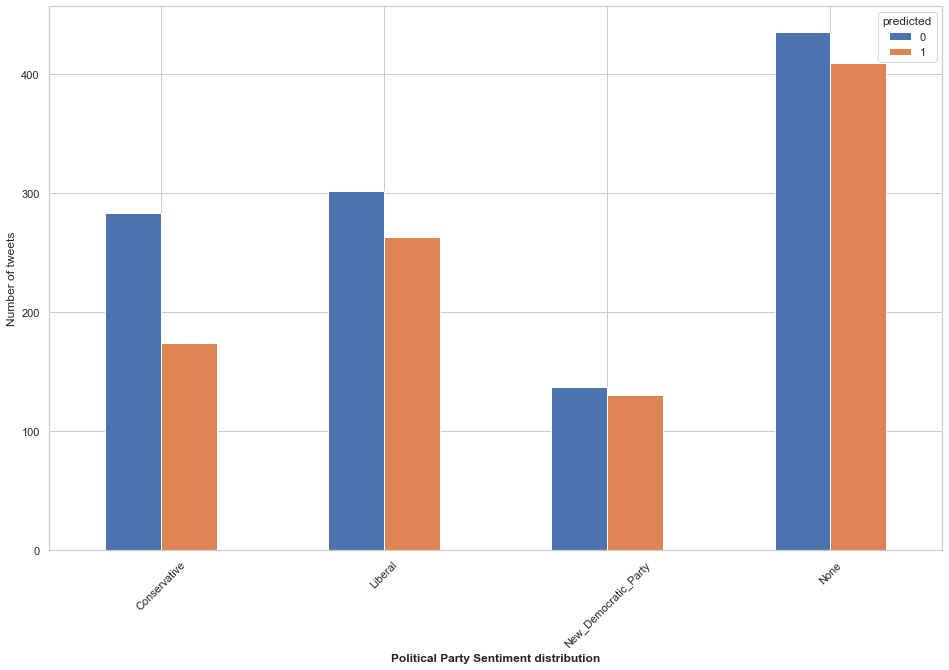

In [573]:
ET.groupby(['political_party', 'predicted']).size().unstack().plot(kind='bar')
plt.xlabel('Political Party Sentiment distribution',fontweight='bold')
plt.ylabel('Number of tweets')
plt.xticks( rotation=45)

#### In our predicted model: for the conservative political party, the positive to negative ratio is high, compared to the Liberal and New Democratic Party. Although this was the outcome of the 2019 election in terms of ranking, the reason it failed to predict the negative reason accurately is mainly  beacause of the how the the algorithm clasified the the tweets based on the negative reason and there a limit to the model's accuracy. It is also because the classses of the negative tweets have similar components.
#### To improve the accuracy, hyperparameter tuning on the selected model can improve the accuracy, also from the tweets collected, the negative reasons could have been more precise instead of them being grouped like "Women Reproductive right and Racism", "Healthcare and Marijuana" and the likes.